## Dataset: 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from O to 60 mph (sec.)
- yr: model year
- car name: car model name

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [88]:
%matplotlib inline

#### Load Data

In [89]:
#Load Dataset
df = pd.read_csv(r"C:\Users\jarre\OneDrive\Desktop\Data_Science\GL_DataScience\Unsupervised_Learning\Problems\auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [90]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
car name        305
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


- No missing values from data set
- Categorical data [horse power, car name]

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [93]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'car name'],
      dtype='object')

In [94]:
df2 = df.drop(['car name'],axis=1)
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [95]:
#convert horsepower to type int
df2['horsepower'] = pd.to_numeric(df2['horsepower'],errors='coerce')
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


converted values in our horsepower column to type int but now must deal with any missing values in that column

In [96]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [97]:
df2.iloc[32]

mpg               25.0
cylinders          4.0
displacement      98.0
horsepower         NaN
weight          2046.0
acceleration      19.0
model year        71.0
Name: 32, dtype: float64

In [98]:
df2.loc[df2['horsepower'].isnull(),'horsepower'] = df2['horsepower'].median()

Filled in missing values in horsepower column with median data value

In [99]:
df2.loc[32]

mpg               25.0
cylinders          4.0
displacement      98.0
horsepower        93.5
weight          2046.0
acceleration      19.0
model year        71.0
Name: 32, dtype: float64

In [100]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


Observations
- Avg mpg is 23
- Avg cylinders is approx 5
- Avg horsepower is 104
- Avg weight is approx 2970 lbs
- Model years range from 1970 to 1982

### Plot Outliers

In [101]:
df2.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year'],
      dtype='object')

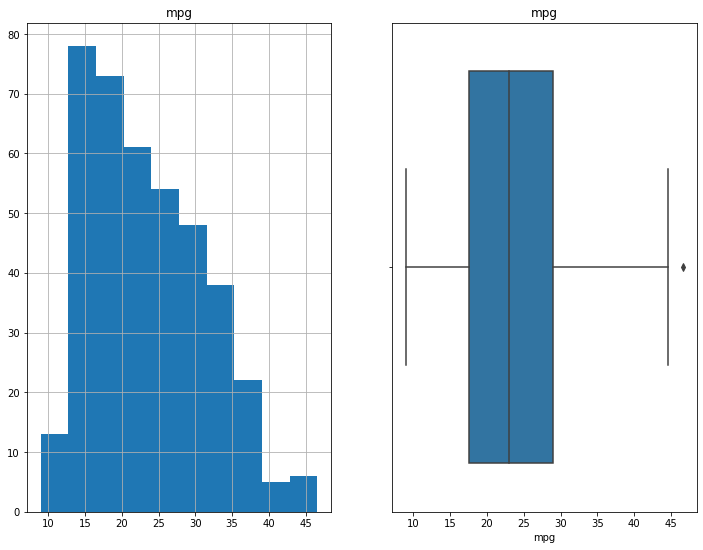

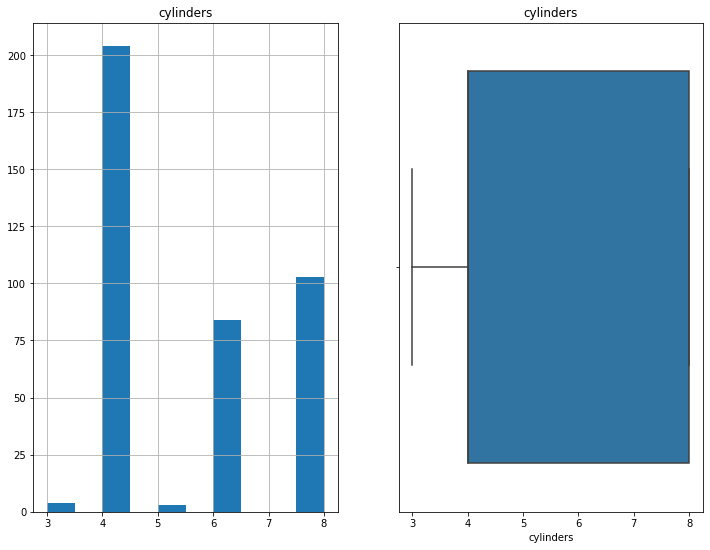

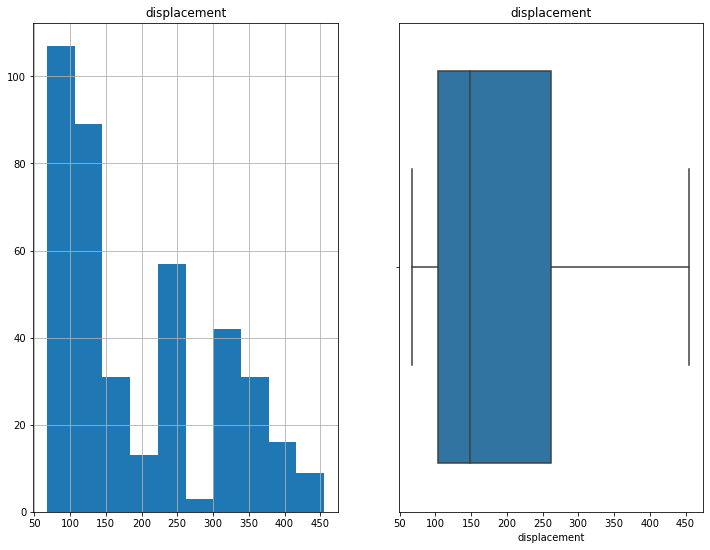

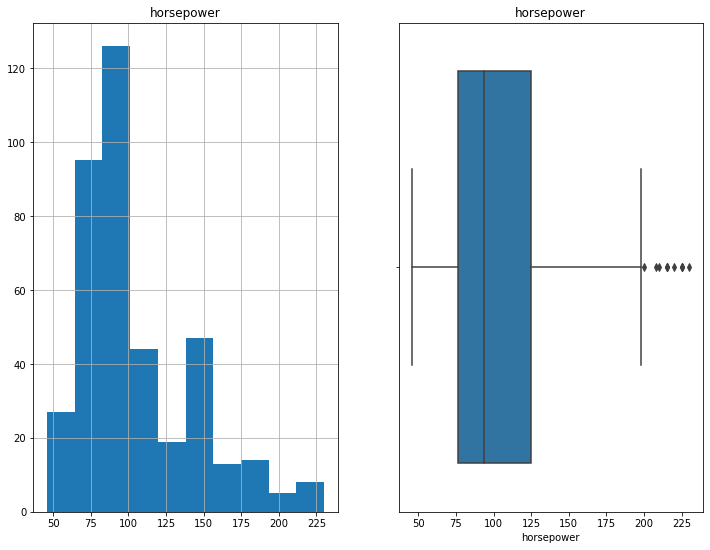

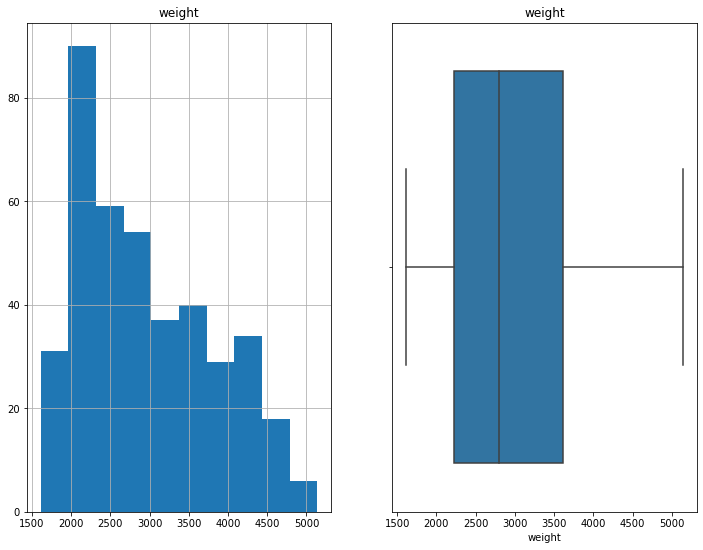

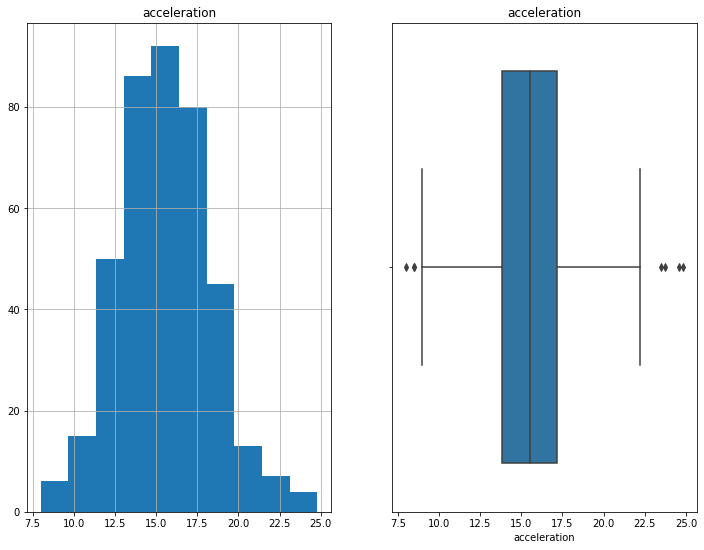

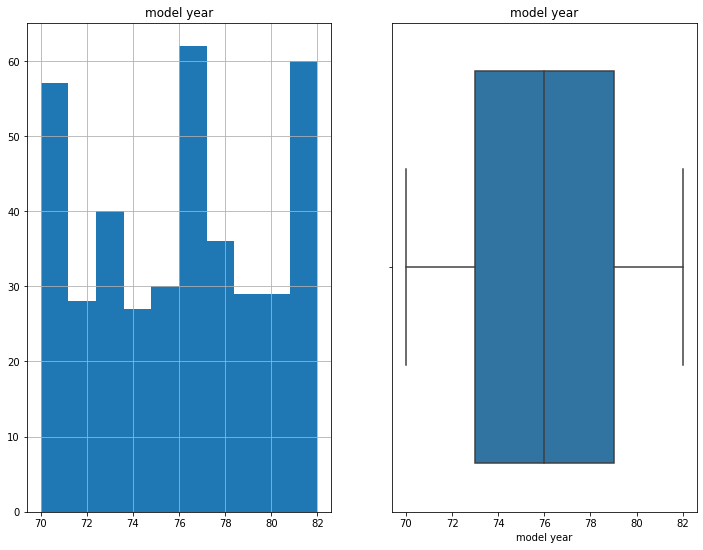

In [102]:
for col in df2.columns:
    fig,ax = plt.subplots(1,2,figsize=(12,9))
    df2[col].hist(ax=ax[0])
    sns.boxplot(x=df2[col],ax=ax[1])
    ax[0].set_title(col)
    ax[1].set_title(col)

#### Observations
- A few outliers in hp. Above 200 hp.
- Acceleration exhibits a normal distribution
- Mpg, weight, horsepower and displacement have right skewed distrbution
- 75% of the cylinders are 4 cylinders and above

## View Correlation

In [103]:
df2.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000


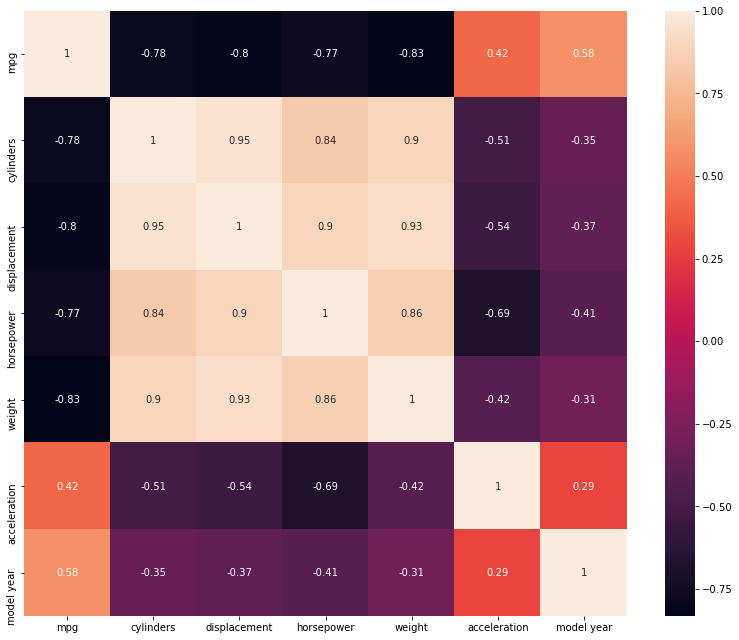

In [104]:
plt.figure(figsize=(11,9))
sns.heatmap(df2.corr(),annot=True)
plt.tight_layout()

Observations
- Strong correlation between number of cylinders and weight,hp,displacement but negative with mpg
- Weight and mpg are inversly related
- Cylinders and acceleration are negatively correlated
- Mpg is positively correlated with model year

## Scaling the Data

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
# build the scaler model
scaler = MinMaxScaler()

In [107]:
# fit using the train set
scaler.fit(df2)

MinMaxScaler()

In [108]:
# transform the test test
dfScale = scaler.transform(df2)
dfScale

array([[0.2393617 , 1.        , 0.61757106, ..., 0.5361497 , 0.23809524,
        0.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.58973632, 0.20833333,
        0.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.51686986, 0.17857143,
        0.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.19336547, 0.21428571,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.2869294 , 0.63095238,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.31386447, 0.67857143,
        1.        ]])

In [109]:
dfScale = pd.DataFrame(dfScale,columns=df2.columns)
dfScale

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0
...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0
394,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0
395,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0
396,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0


## Principal Component Analysis

In [110]:
n = len(dfScale.columns)

In [133]:
pca = PCA(n_components=n,random_state=1)
pca_df = pd.DataFrame(pca.fit_transform(dfScale),columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7'])

In [134]:
pca_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,0.751232,0.276313,-0.074662,-0.231106,-0.055170,-0.030225,-0.038201
1,0.916510,0.246424,-0.132602,-0.116535,0.014690,0.017842,0.044061
2,0.802695,0.269108,-0.167742,-0.206268,-0.022396,0.014363,0.000454
3,0.793155,0.281538,-0.104672,-0.174981,-0.049347,0.056073,0.004139
4,0.780660,0.281614,-0.168709,-0.200410,-0.082302,-0.005261,-0.039778
...,...,...,...,...,...,...,...
393,-0.452388,-0.367018,-0.055197,0.170833,-0.018346,-0.045397,0.000462
394,-0.870759,-0.357412,0.323485,-0.233066,0.263788,0.052877,0.045159
395,-0.519889,-0.353322,-0.323211,0.048710,-0.053374,-0.085841,-0.001090
396,-0.544771,-0.350885,0.094692,0.123003,0.006059,0.017955,0.027731


In [114]:
exp_var = pca.explained_variance_ratio_
exp_var

array([0.72437455, 0.17306353, 0.04976805, 0.02686512, 0.01397452,
       0.00657193, 0.0053823 ])

In [118]:
def newcol(x):
    y = {}
    sum = 0
    for i,num in enumerate(x):
        sum += num
        y[i+1] = sum
    return y

var_dict = newcol(exp_var)

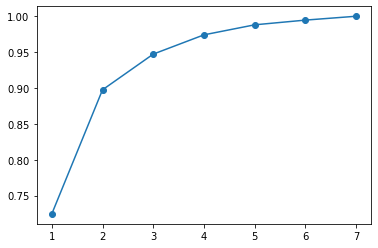

In [119]:
plt.plot(var_dict.keys(),var_dict.values(),'-o')
plt.show()

In [120]:
exp_var

array([0.72437455, 0.17306353, 0.04976805, 0.02686512, 0.01397452,
       0.00657193, 0.0053823 ])

In [124]:
sum = 0
for i,num in enumerate(exp_var):
        sum += num
        if sum >= .90:
               print(f"Component number {i+1}")
               break

Component number 3


In [128]:
pca.components_[:3,:]

array([[-0.3207958 ,  0.56530086,  0.45475366,  0.33322856,  0.38924305,
        -0.16499229, -0.28451754],
       [-0.11883528, -0.23828371, -0.1670305 , -0.05676616, -0.18773679,
        -0.00157614, -0.92883254],
       [-0.22537362,  0.12766215,  0.01161061, -0.33970939,  0.24750786,
         0.86877017, -0.03674336]])

In [129]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=dfScale.columns)
data_pca.T

,PC1,PC2,PC3
mpg,-0.32,-0.12,-0.23
cylinders,0.57,-0.24,0.13
displacement,0.45,-0.17,0.01
horsepower,0.33,-0.06,-0.34
weight,0.39,-0.19,0.25
acceleration,-0.16,-0.00,0.87
model year,-0.28,-0.93,-0.04


In [137]:
df_all = pd.concat([pca_df, df], axis=1)
df_all.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,0.751232,0.276313,-0.074662,-0.231106,-0.055170,-0.030225,-0.038201,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,0.916510,0.246424,-0.132602,-0.116535,0.014690,0.017842,0.044061,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,0.802695,0.269108,-0.167742,-0.206268,-0.022396,0.014363,0.000454,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,0.793155,0.281538,-0.104672,-0.174981,-0.049347,0.056073,0.004139,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,0.780660,0.281614,-0.168709,-0.200410,-0.082302,-0.005261,-0.039778,17.0,8,302.0,140,3449,10.5,70,ford torino


c:\Users\jarre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\jarre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'PC2')

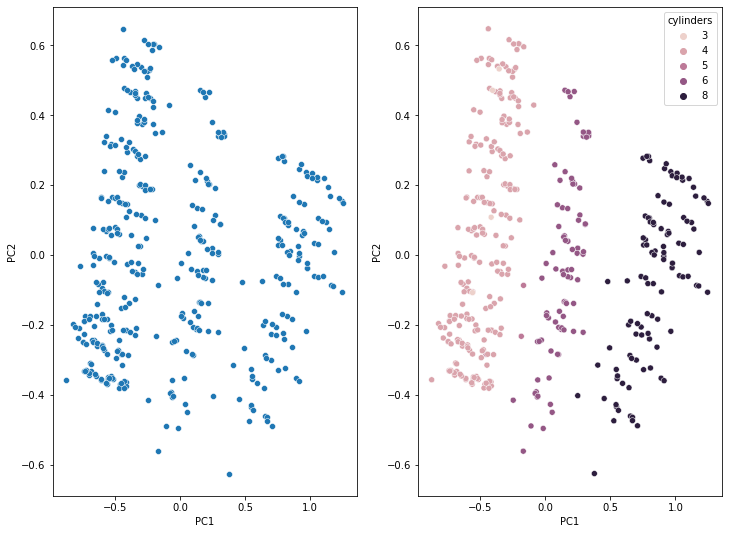

In [138]:
fig2, ax2 = plt.subplots(1,2,figsize=(12,9))
sns.scatterplot(df_all['PCA1'],df_all['PCA2'],ax=ax2[0])
ax2[0].set_xlabel('PC1')
ax2[0].set_ylabel('PC2')
sns.scatterplot(df_all['PCA1'],df_all['PCA2'],ax=ax2[1],hue=df['cylinders'])
ax2[1].set_xlabel('PC1')
ax2[1].set_ylabel('PC2')

Observations
- 3 Cluster Groups
- Group 1 (3,4,5 cylinders)
- Group 2 (6 cylinder)
- Group 3 (8 cylinder)